#   Machine learning competition 
### Predict Student Performance from Game Play
### Trace student learning from Jo Wilder online educational game
### link: https://www.kaggle.com/competitions/predict-student-performance-from-game-play

### 1) Data exploration and cleaning 

In [41]:
import pandas as pd
import dask.dataframe as dd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('test.csv')
df_labels = pd.read_csv('train_labels.csv')

In [3]:
df.describe()

,session_id,index,elapsed_time,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,fullscreen,hq,music
count,3.728000e+03,3728.000000,3.728000e+03,3728.000000,153.000000,3366.000000,3366.000000,3366.000000,3366.000000,353.000000,0.0,0.0,0.0
mean,2.009024e+16,670.427039,2.065026e+06,12.171137,3.405229,-14.706281,-131.060856,463.707665,394.447415,1415.631728,NaN,NaN,NaN
std,9.599042e+10,411.203747,2.079750e+06,6.282262,2.037277,511.111044,224.031904,243.673841,133.453547,2664.616915,NaN,NaN,NaN
min,2.009011e+16,0.000000,0.000000e+00,0.000000,0.000000,-1913.116237,-908.325270,0.000000,10.000000,15.000000,NaN,NaN,NaN
25%,2.009011e+16,320.000000,5.708750e+05,7.000000,2.000000,-290.094620,-232.803150,278.250000,320.250000,83.000000,NaN,NaN,NaN
50%,2.009031e+16,642.000000,1.174912e+06,11.000000,4.000000,16.843882,-109.000000,460.000000,408.000000,416.000000,NaN,NaN,NaN
75%,2.009031e+16,983.250000,2.481634e+06,18.000000,5.000000,355.095522,1.006296,680.000000,486.000000,1316.000000,NaN,NaN,NaN
max,2.009031e+16,1563.000000,6.524025e+06,22.000000,6.000000,1214.941972,489.514956,879.000000,658.000000,23451.000000,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3728 entries, 0 to 3727
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   session_id      3728 non-null   int64  
 1   index           3728 non-null   int64  
 2   elapsed_time    3728 non-null   int64  
 3   event_name      3728 non-null   object 
 4   name            3728 non-null   object 
 5   level           3728 non-null   int64  
 6   page            153 non-null    float64
 7   room_coor_x     3366 non-null   float64
 8   room_coor_y     3366 non-null   float64
 9   screen_coor_x   3366 non-null   float64
 10  screen_coor_y   3366 non-null   float64
 11  hover_duration  353 non-null    float64
 12  text            1162 non-null   object 
 13  fqid            2505 non-null   object 
 14  room_fqid       3728 non-null   object 
 15  text_fqid       1162 non-null   object 
 16  fullscreen      0 non-null      float64
 17  hq              0 non-null      f

In [5]:
df

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,...,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group,session_level
0,20090109393214576,0,0,cutscene_click,basic,0,NaN,-413.991405,75.685314,380.0,...,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,NaN,NaN,NaN,0-4,20090109393214576_0-4
1,20090109393214576,1,1965,person_click,basic,0,NaN,-105.991405,-63.314686,688.0,...,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,NaN,NaN,NaN,0-4,20090109393214576_0-4
2,20090109393214576,2,3614,person_click,basic,0,NaN,-418.991405,47.685314,375.0,...,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,NaN,NaN,NaN,0-4,20090109393214576_0-4
3,20090109393214576,3,5330,person_click,basic,0,NaN,-110.991405,-57.314686,683.0,...,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,NaN,NaN,NaN,0-4,20090109393214576_0-4
4,20090109393214576,4,6397,person_click,basic,0,NaN,-110.991405,-57.314686,683.0,...,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,NaN,NaN,NaN,0-4,20090109393214576_0-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3723,20090312331414616,1001,1581679,map_hover,basic,22,NaN,NaN,NaN,NaN,...,484.0,NaN,tunic.wildlife,tunic.historicalsociety.entry,NaN,NaN,NaN,NaN,13-22,20090312331414616_13-22
3724,20090312331414616,1002,1583044,map_hover,basic,22,NaN,NaN,NaN,NaN,...,783.0,NaN,tunic.capitol_2,tunic.historicalsociety.entry,NaN,NaN,NaN,NaN,13-22,20090312331414616_13-22
3725,20090312331414616,1003,1583410,map_click,undefined,22,NaN,483.726363,-3.880047,456.0,...,NaN,NaN,tunic.capitol_2,tunic.historicalsociety.entry,NaN,NaN,NaN,NaN,13-22,20090312331414616_13-22
3726,20090312331414616,1004,1585841,navigate_click,undefined,22,NaN,192.372139,38.216178,383.0,...,NaN,NaN,chap4_finale_c,tunic.capitol_2.hall,NaN,NaN,NaN,NaN,13-22,20090312331414616_13-22


### a - We can reduce the amount of memory allocated on the RAM by scaling the data types of the columns to less expensive types so that memory is not wasted.

In [6]:
dtypes = { 'session_id': 'uint64',
    'index': 'uint16',
    'elapsed_time': 'uint32',
    'event_name': 'object',
    'name': 'object',
    'level': 'uint8', 
    'page': 'float16',
    'room_coor_x': 'float64',
    'room_coor_y': 'float64',
    'screen_coor_x': 'float64',
    'screen_coor_y': 'float64',
    'hover_duration':'float64',
    'text': 'object',
    'fqid': 'object',
    'room_fqid': 'object',
    'text_fqid': 'object',
    'fullscreen':'object', 
    'hq':'object', 
    'music': 'object', 
    'level_group': 'object',
}



### b - We can use a dask dataframe to load the data faster and then convert that into a pandas dataframe for the manipulation

In [7]:
# Load the data using dask
df_train = dd.read_csv("./train.csv", 
                      dtype=dtypes)

In [8]:
# transform the dask lazy frame into its memory equivalent which is a pandas frame
frame = df_train.compute()

In [9]:
frame

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
0,20090312431273200,0,0,cutscene_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,NaN,NaN,NaN,0-4
1,20090312431273200,1,1323,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,NaN,NaN,NaN,0-4
2,20090312431273200,2,831,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,NaN,NaN,NaN,0-4
3,20090312431273200,3,1147,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,NaN,NaN,NaN,0-4
4,20090312431273200,4,1863,person_click,basic,0,NaN,-412.991405,-159.314686,381.0,494.0,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,NaN,NaN,NaN,0-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123169,22100221145014656,1600,5483231,navigate_click,undefined,22,NaN,343.887291,36.701026,483.0,273.0,NaN,NaN,NaN,tunic.capitol_2.hall,NaN,NaN,NaN,NaN,13-22
123170,22100221145014656,1601,5485166,navigate_click,undefined,22,NaN,332.696070,141.493178,545.0,221.0,NaN,NaN,chap4_finale_c,tunic.capitol_2.hall,NaN,NaN,NaN,NaN,13-22
123171,22100221145014656,1602,5485917,navigate_click,undefined,22,NaN,369.912859,140.569205,611.0,217.0,NaN,NaN,NaN,tunic.capitol_2.hall,NaN,NaN,NaN,NaN,13-22
123172,22100221145014656,1603,5486753,navigate_click,undefined,22,NaN,252.299653,123.805889,526.0,232.0,NaN,NaN,chap4_finale_c,tunic.capitol_2.hall,NaN,NaN,NaN,NaN,13-22


In [10]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13174211 entries, 0 to 123173
Data columns (total 20 columns):
 #   Column          Dtype  
---  ------          -----  
 0   session_id      uint64 
 1   index           uint16 
 2   elapsed_time    uint32 
 3   event_name      object 
 4   name            object 
 5   level           uint8  
 6   page            float16
 7   room_coor_x     float64
 8   room_coor_y     float64
 9   screen_coor_x   float64
 10  screen_coor_y   float64
 11  hover_duration  float64
 12  text            object 
 13  fqid            object 
 14  room_fqid       object 
 15  text_fqid       object 
 16  fullscreen      object 
 17  hq              object 
 18  music           object 
 19  level_group     object 
dtypes: float16(1), float64(5), object(10), uint16(1), uint32(1), uint64(1), uint8(1)
memory usage: 1.8+ GB


#### Comments: We can see that the memory went down from the original 2.3GB to 1.8GB after manually scaling down the data types of the columns

In [11]:
frame.describe()

,session_id,index,elapsed_time,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration
count,1.317421e+07,1.317421e+07,1.317421e+07,1.317421e+07,284746.0,1.213797e+07,1.213797e+07,1.213797e+07,1.213797e+07,1.000737e+06
mean,2.113413e+16,6.526426e+02,3.846817e+06,1.219194e+01,NaN,-5.493615e+01,-1.162997e+02,4.581144e+02,3.852363e+02,3.186237e+03
std,5.665220e+14,6.275818e+02,2.701387e+07,6.499188e+00,0.0,5.201468e+02,2.185912e+02,2.472144e+02,1.292879e+02,3.692265e+05
min,2.009031e+16,0.000000e+00,0.000000e+00,0.000000e+00,0.0,-1.992355e+03,-9.181587e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.101031e+16,2.890000e+02,4.394300e+05,6.000000e+00,1.0,-3.529376e+02,-2.128361e+02,2.690000e+02,3.040000e+02,1.000000e+02
50%,2.104022e+16,5.960000e+02,1.013425e+06,1.300000e+01,3.0,-1.116317e+01,-9.778151e+01,4.470000e+02,3.970000e+02,4.180000e+02
75%,2.110051e+16,8.970000e+02,1.740050e+06,1.800000e+01,5.0,2.963618e+02,2.268531e+01,6.630000e+02,4.710000e+02,1.266000e+03
max,2.210022e+16,2.047300e+04,1.749293e+09,2.200000e+01,6.0,1.261774e+03,5.436164e+02,1.916000e+03,1.439000e+03,2.199078e+08


In [12]:
cols

['session_id',
 'index',
 'elapsed_time',
 'event_name',
 'name',
 'level',
 'page',
 'room_coor_x',
 'room_coor_y',
 'screen_coor_x',
 'screen_coor_y',
 'hover_duration',
 'text',
 'fqid',
 'room_fqid',
 'text_fqid',
 'fullscreen',
 'hq',
 'music',
 'level_group']

In [13]:
# those 3 columns are empty in the test dataset as well as in the train dataset so we can get rid of it
frame = frame.drop(columns=['fullscreen', 'hq', 'music'])

In [14]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13174211 entries, 0 to 123173
Data columns (total 17 columns):
 #   Column          Dtype  
---  ------          -----  
 0   session_id      uint64 
 1   index           uint16 
 2   elapsed_time    uint32 
 3   event_name      object 
 4   name            object 
 5   level           uint8  
 6   page            float16
 7   room_coor_x     float64
 8   room_coor_y     float64
 9   screen_coor_x   float64
 10  screen_coor_y   float64
 11  hover_duration  float64
 12  text            object 
 13  fqid            object 
 14  room_fqid       object 
 15  text_fqid       object 
 16  level_group     object 
dtypes: float16(1), float64(5), object(7), uint16(1), uint32(1), uint64(1), uint8(1)
memory usage: 1.5+ GB


#### Comments: We can see here that the memory allocated on the RAM for the frame went down .3GB after removing the useless columns

In [15]:
frame['event_name'].unique()

array(['cutscene_click', 'person_click', 'navigate_click',
       'observation_click', 'notification_click', 'object_click',
       'object_hover', 'map_hover', 'map_click', 'checkpoint',
       'notebook_click'], dtype=object)

In [16]:
len(frame['session_id'].unique())

11779

In [17]:
frame

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,level_group
0,20090312431273200,0,0,cutscene_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0-4
1,20090312431273200,1,1323,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0-4
2,20090312431273200,2,831,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0-4
3,20090312431273200,3,1147,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0-4
4,20090312431273200,4,1863,person_click,basic,0,NaN,-412.991405,-159.314686,381.0,494.0,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123169,22100221145014656,1600,5483231,navigate_click,undefined,22,NaN,343.887291,36.701026,483.0,273.0,NaN,NaN,NaN,tunic.capitol_2.hall,NaN,13-22
123170,22100221145014656,1601,5485166,navigate_click,undefined,22,NaN,332.696070,141.493178,545.0,221.0,NaN,NaN,chap4_finale_c,tunic.capitol_2.hall,NaN,13-22
123171,22100221145014656,1602,5485917,navigate_click,undefined,22,NaN,369.912859,140.569205,611.0,217.0,NaN,NaN,NaN,tunic.capitol_2.hall,NaN,13-22
123172,22100221145014656,1603,5486753,navigate_click,undefined,22,NaN,252.299653,123.805889,526.0,232.0,NaN,NaN,chap4_finale_c,tunic.capitol_2.hall,NaN,13-22


In [18]:
frame.loc[frame['session_id']==20090312431273200]

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,level_group
0,20090312431273200,0,0,cutscene_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0-4
1,20090312431273200,1,1323,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0-4
2,20090312431273200,2,831,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0-4
3,20090312431273200,3,1147,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0-4
4,20090312431273200,4,1863,person_click,basic,0,NaN,-412.991405,-159.314686,381.0,494.0,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,20090312431273200,927,1267357,navigate_click,undefined,22,NaN,927.307255,-10.355929,838.0,335.0,NaN,NaN,tomap,tunic.historicalsociety.entry,NaN,13-22
877,20090312431273200,928,1268292,map_hover,basic,22,NaN,NaN,NaN,NaN,NaN,366.0,NaN,tomap,tunic.historicalsociety.entry,NaN,13-22
878,20090312431273200,929,1269474,map_click,undefined,22,NaN,457.523005,22.141338,443.0,316.0,NaN,NaN,tunic.capitol_2,tunic.historicalsociety.entry,NaN,13-22
879,20090312431273200,930,1270708,navigate_click,undefined,22,NaN,224.190321,-60.268671,404.0,337.0,NaN,NaN,chap4_finale_c,tunic.capitol_2.hall,NaN,13-22


In [19]:
df_labels.loc[df_labels['session_id'].str.contains('20090312431273200')]

,session_id,correct
0,20090312431273200_q1,1
11779,20090312431273200_q2,1
23558,20090312431273200_q3,1
35337,20090312431273200_q4,1
47116,20090312431273200_q5,1
58895,20090312431273200_q6,1
70674,20090312431273200_q7,1
82453,20090312431273200_q8,1
94232,20090312431273200_q9,1
106011,20090312431273200_q10,1


#### Comments: The dataset is comprised of many rows each describing a player going throught the game. At each iteration, the row tells us the type of interactions going on, the position of the mouse and other similar things. At some point in the "experience", the subject is being asked questions and whether or not the answer to the question is right is stored as a label. 

In [20]:
frame.corr()

,session_id,index,elapsed_time,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration
session_id,1.000000,-0.051681,0.020592,-0.001359,0.025938,0.000245,-0.004962,0.006690,0.009943,0.001087
index,-0.051681,1.000000,0.076249,0.572491,0.242650,-0.005838,-0.135469,0.024571,0.025236,-0.002589
elapsed_time,0.020592,0.076249,1.000000,0.089829,0.088839,-0.003381,-0.019823,0.000277,0.001249,0.012441
level,-0.001359,0.572491,0.089829,1.000000,0.948628,-0.048371,-0.238521,0.031491,0.047835,-0.003141
page,0.025938,0.242650,0.088839,0.948628,1.000000,0.003165,-0.094238,0.006282,-0.006073,NaN
room_coor_x,0.000245,-0.005838,-0.003381,-0.048371,0.003165,1.000000,0.078846,0.688065,-0.174714,NaN
room_coor_y,-0.004962,-0.135469,-0.019823,-0.238521,-0.094238,0.078846,1.000000,0.091298,-0.776146,NaN
screen_coor_x,0.006690,0.024571,0.000277,0.031491,0.006282,0.688065,0.091298,1.000000,-0.124072,NaN
screen_coor_y,0.009943,0.025236,0.001249,0.047835,-0.006073,-0.174714,-0.776146,-0.124072,1.000000,NaN
hover_duration,0.001087,-0.002589,0.012441,-0.003141,NaN,NaN,NaN,NaN,NaN,1.000000


In [1]:
fig, ax = plt.subplots(figsize=(10,10)) 
sb.heatmap(frame.corr(), cmap='crest', annot=True, ax=ax)

NameError: name 'plt' is not defined

<AxesSubplot:title={'center':'Distribution over levels'}, ylabel='Frequency'>

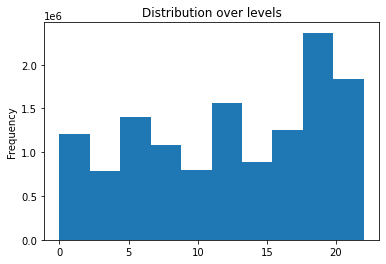

In [29]:
frame['level'].plot(kind='hist', title='Distribution over levels')

<AxesSubplot:title={'center':'Distribution over room coordinate x values'}, ylabel='Frequency'>

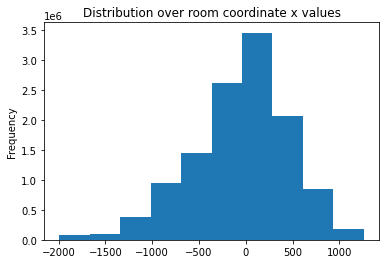

In [31]:
frame['room_coor_x'].plot(kind='hist', title='Distribution over room coordinate x values')

<AxesSubplot:title={'center':'Distribution over room coordinate y values'}, ylabel='Frequency'>

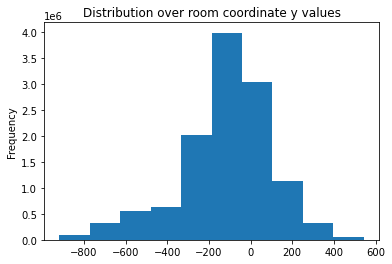

In [37]:
frame['room_coor_y'].plot(kind='hist', title='Distribution over room coordinate y values')

In [68]:
frame['room_fqid'].unique()

array(['tunic.historicalsociety.closet',
       'tunic.historicalsociety.basement',
       'tunic.historicalsociety.entry',
       'tunic.historicalsociety.collection',
       'tunic.historicalsociety.stacks', 'tunic.kohlcenter.halloffame',
       'tunic.capitol_0.hall', 'tunic.historicalsociety.closet_dirty',
       'tunic.historicalsociety.frontdesk',
       'tunic.humanecology.frontdesk', 'tunic.drycleaner.frontdesk',
       'tunic.library.frontdesk', 'tunic.library.microfiche',
       'tunic.capitol_1.hall', 'tunic.historicalsociety.cage',
       'tunic.historicalsociety.collection_flag', 'tunic.wildlife.center',
       'tunic.flaghouse.entry', 'tunic.capitol_2.hall'], dtype=object)

In [72]:
x = frame.loc[frame['room_fqid']=='tunic.historicalsociety.closet']['room_coor_x'].values
y = frame.loc[frame['room_fqid']=='tunic.historicalsociety.closet']['room_coor_y'].values

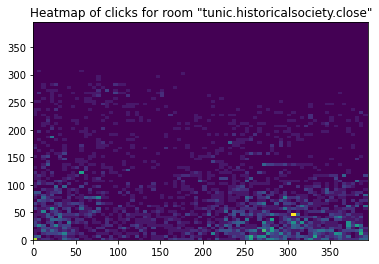

In [75]:
plt.hist2d(x,y, bins=[np.arange(0,400,5),np.arange(0,400,5)])
plt.title('Heatmap of clicks for room "tunic.historicalsociety.close"')
plt.show()

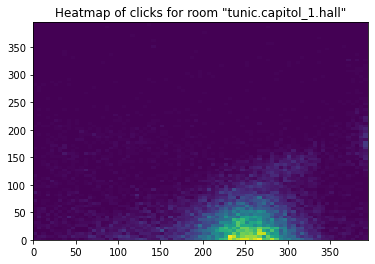

In [77]:
x = frame.loc[frame['room_fqid']=='tunic.capitol_1.hall']['room_coor_x'].values
y = frame.loc[frame['room_fqid']=='tunic.capitol_1.hall']['room_coor_y'].values
plt.hist2d(x,y, bins=[np.arange(0,400,5),np.arange(0,400,5)])
plt.title('Heatmap of clicks for room "tunic.capitol_1.hall"')
plt.show()

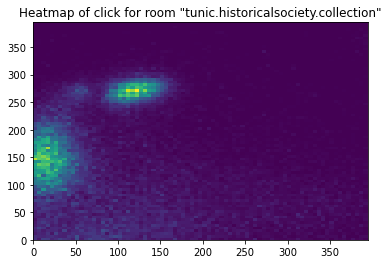

In [78]:
x = frame.loc[frame['room_fqid']=='tunic.historicalsociety.collection']['room_coor_x'].values
y = frame.loc[frame['room_fqid']=='tunic.historicalsociety.collection']['room_coor_y'].values
plt.hist2d(x,y, bins=[np.arange(0,400,5),np.arange(0,400,5)])
plt.title('Heatmap of click for room "tunic.historicalsociety.collection"')
plt.show()

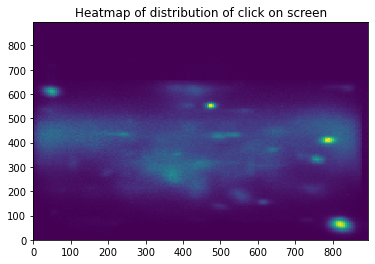

In [61]:
x = frame['screen_coor_x'].values
y = frame['screen_coor_y'].values
plt.hist2d(x,y, bins=[np.arange(0,900,5),np.arange(0,900,5)])
plt.title('Heatmap of distribution of click on screen')
plt.show()

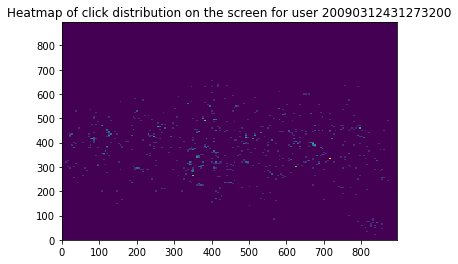

In [59]:
x = frame['screen_coor_x'].loc[frame['session_id']==20090312431273200]
y = frame['screen_coor_y'].loc[frame['session_id']==20090312431273200]
plt.hist2d(x,y, bins=[np.arange(0,900,5),np.arange(0,900,5)])
plt.title('Heatmap of click distribution on the screen for user 20090312431273200')
plt.show()

In [ ]:
frame.loc[frame['']]